#DATA SCIENCE INTERN AT LET'S GROW MORE(LGM)#

##Author : Shuvam Chakraborty

#Beginners Level Task-1

##Iris Flower Classification ML Project

Dataset link: http://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing The Dataset

from sklearn.datasets import load_iris

In [3]:
#Loading data

iris=load_iris()
dataset=iris.data
dataset= pd.DataFrame(dataset,columns=iris.feature_names)
print(dataset)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [4]:
dataset['label']=iris.target
print(dataset)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  label
0                  5.1               3.5  ...               0.2      0
1                  4.9               3.0  ...               0.2      0
2                  4.7               3.2  ...               0.2      0
3                  4.6               3.1  ...               0.2      0
4                  5.0               3.6  ...               0.2      0
..                 ...               ...  ...               ...    ...
145                6.7               3.0  ...               2.3      2
146                6.3               2.5  ...               1.9      2
147                6.5               3.0  ...               2.0      2
148                6.2               3.4  ...               2.3      2
149                5.9               3.0  ...               1.8      2

[150 rows x 5 columns]


##Dataset Analysis

In [5]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
dataset.ndim

2

In [8]:
dataset.shape

(150, 5)

In [9]:
dataset.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
label                0.0
dtype: float64

In [10]:
dataset.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
label                2.0
dtype: float64

In [11]:
dataset.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

##Data Visualization

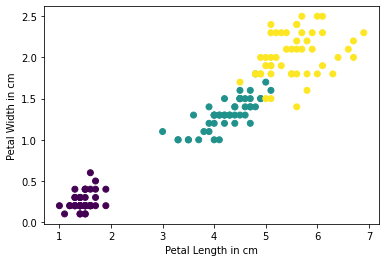

In [12]:
plt.scatter(dataset.iloc[:,2],dataset.iloc[:,3], c=iris.target)
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.show()

In [13]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    dataset[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=dataset[a],shadow = True, startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    dataset[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=dataset['petal width (cm)'],y=dataset['sepal width (cm)'],hue=dataset[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=dataset[a],y=dataset['petal width (cm)'],hue=dataset['sepal width (cm)'],ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of"+a.title())
    plt.show()

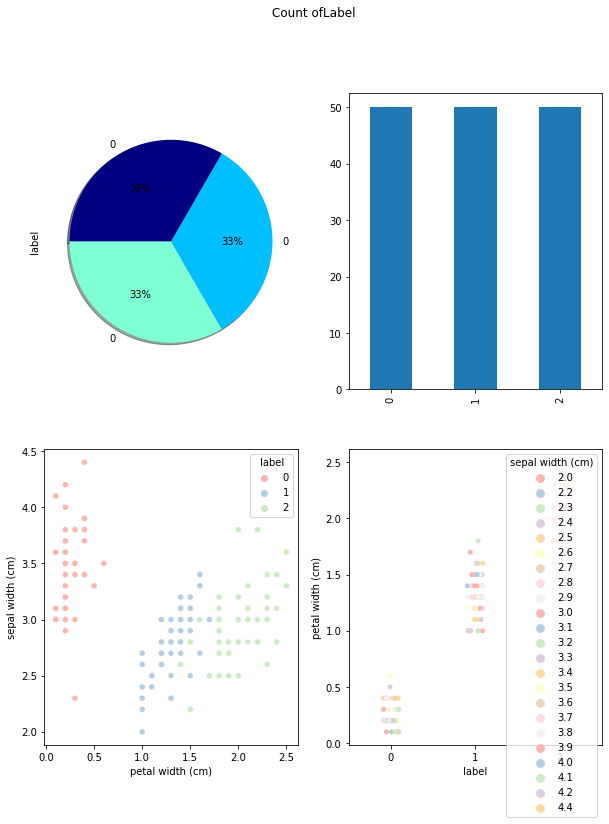

In [14]:
plot_cat('label')

##Label Encoder and Splitting Data

In [15]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()

In [16]:
dataset['label'] = L.fit_transform(dataset['label'])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
X = dataset.drop(columns=['label'])
Y = dataset['label']

##ML Models

In [24]:
from sklearn.pipeline import Pipeline as pp
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
def classify(model, x, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = pp([('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

In [26]:
#Logistical Regression Method

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy: 94.73684210526315


Accuracy: 92.10526315789474


[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.85\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.142\nsamples = 39\nvalue = [0, 3, 36]')]

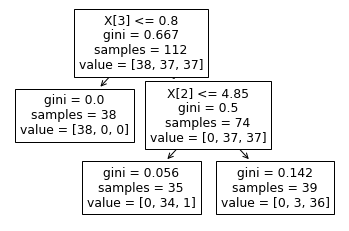

In [27]:
#Decision Tree Classifier Method

from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 2)
classify(model,X,Y)
tree.plot_tree(model)

In [28]:
#KNN Classifier Method

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
classify(model,X,Y)

Accuracy: 92.10526315789474


In [29]:
#Random Forest Classifier Method

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy: 92.10526315789474


##Accuracy of Different Classifier Methods :->

###(1) Logistical Regression Method : 94.73684210526315
###(2) Decision Tree Classifier Method : 94.73684210526315
###(3) KNN Classifier Method : 92.10526315789474
###(4) Random Forest Classifier Method : 92.10526315789474

#Thank You Let's Grow More(LGM)